# Palmers Penguins 
***
This notebook contains my analysis of the famous palmer penguins dataset.
The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/)


## Background of the Palmer Penguins dataset 
***
The Palmer Penguins dataset, orginally created to study Antarctic penguins’ foraging behavior and relationship with environmental variability, is a commonly used dataset for data exploration and visualization.  
The dataset was collected by [Dr.Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) with  the [Palmer Station, Antarctica, Long-Term Ecological Research program](https://pallter.marine.rutgers.edu/).  
The dataset tracks three species of penguin across three Antartic islands measuring different attributes of the penguin i.e. flipper length, body mass, sex and bill length and depth.

##### Species:
|Adelie    |Gentoo | Chinstrap|
|-----------|---------------|------------|
|![Adelie](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg/173px-Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg)|![Gentoo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Gentoo_Penguin_Baby_%2824940372635%29.jpg/209px-Gentoo_Penguin_Baby_%2824940372635%29.jpg)|![Chinstrap](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/160px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg)|

The version of the dataset used in this notebook focuses on a reduced amount of variables from the original dataset, including:
   - Species of penguin
   - Island the penguin was located on
   - Bill length and depth (mm)
   - Flipper length (mm)
   - Body mass (g)
   - Sex of the penguin

## Libaries used
***

In [79]:
# Importing required libaries from python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse as elps
from tabulate import tabulate as tb


## Reading in the data
***

In [80]:
# Loading the penguins data set using the raw data link from github
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Filtering the data
***


Before working with the data we will first filter the data to allow us to look specifically at the data based on different values in specific fields.  
These filters will be used throughout the project for enhancing plots and allowing us to visually present a 3rd deminsion in the plots using colour.

In [81]:
# Filter the data based on the sex
female_df = df[df['sex'] == 'FEMALE']
male_df = df[df['sex'] == 'MALE']

# Filter the dataset based on location
torgersen_df = df[df['island'] == 'Torgersen']
biscoe_df = df[df['island'] == 'Biscoe']
dream_df = df[df['island'] == 'Dream']

# Filter the data based on the species
adelie_data = df[df['species'] == 'Adelie']
gentoo_data = df[df['species'] == 'Gentoo']
chinstrap_data = df[df['species'] == 'Chinstrap']

# Filter the data for the flipper length and body mass
flip_len = df['flipper_length_mm']
body_mass = df['body_mass_g']

## First look at the data
***
Of the variables in the dataset 3 are text based (Species of penguin, island and sex) so here the data type string would be fitting.

The remaining variables are numerical values (Bill length, bill depth, flipper length and body mass).

For bill length and bill depth we can see decimal values in the dataset, with this the suggestion for the data type to be used for those fields would be float so that python could handle the decimal places.

Flipper length and body mass appear to be whole numbers in the dataset, with this these values don't have the restriction of needing decimal places to be considered with the numbers as they are present in the dataset and so technically int could be used.  
Since we may wish to do some equations using the different values in the dataset as the project progresses the suggestion would be for the data type float to also be used here. This would also be a benefit as it would be more consistent to use the same data type across the numeric values.  

Bearing these thoughts in mind we will now use some methods from the pandas libraries to take a first high level look at the data.

#### Checking the datatypes

In [82]:
#Take a look at the different variables in the dataset and display the data type for each
# Get unique data types in each column
data_types = df.dtypes

# Print the variables along with their data types
print(f'Variable:\t  Data type:\n{df.dtypes}')


Variable:	  Data type:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


Above we can see the breakdown of the datatypes per variable.  
As expected we see the numeric values are of datatype float.

For the variables species, island and sex we see object datatype.
Within pandas the object data type is the most general data type and can hold any Python objects including strings. 

Next we will take a look deeper at the numerical variables to get a quick summary of the dataset. 

#### Diving deeper into the variables

In [83]:
# Checking some basic information of the dataset
length_df = len(df) # checking the number of entries in the dataset
df_stat_summary = df.describe() # getting a summary of the numerical values in the dataset

# Display the summary statistics
print(f'\nThe number of rows in the dataset is {length_df}.')
print(f'\nStatistical summary of the numeric varibales in the dataset:\n\n{df_stat_summary}')



The number of rows in the dataset is 344.

Statistical summary of the numeric varibales in the dataset:

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


From the output of the cell above we can see a quick high level statistical overview for the numeric variables.   
We can see that there are a total of 344 lines in the dataset (excluding the headings).  

In the summary of the numeric variables we can see that there are 342 entries in the datset for each of the numeric values.  
With this we could assume that each numeric column has 2 blank entries but lets do a quick check to validate if that assumption is correct.  

To varify this assumption we can use the isna() method to check for blank cells in the CSV file.


In [84]:
# Check for NaN values in each column and calculate the sum
nan_counts = df.isna().sum()
print(f'\nCount of blank cells per column:\n')
print(nan_counts)



Count of blank cells per column:

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


We see here that the assumptionis confirmed that the numerical variables are each missing the data for two entries in the dataset.

As we have already created filters for the dataset above we can also use these filters to only return the data based on the value selected.
For example, if we want to specifically get the numerical summary only for the entries of the Gentoo species we could do that using the describe() method again but instead this time using the filtered gentoo_data. 

In [85]:
# Call describe() directly on gentoo_data
summary_stats_gentoo = gentoo_data.describe()

# Display the summary statistics
print(f'Gentoo data:\n{summary_stats_gentoo}')

Gentoo data:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      123.000000     123.000000         123.000000   123.000000
mean        47.504878      14.982114         217.186992  5076.016260
std          3.081857       0.981220           6.484976   504.116237
min         40.900000      13.100000         203.000000  3950.000000
25%         45.300000      14.200000         212.000000  4700.000000
50%         47.300000      15.000000         216.000000  5000.000000
75%         49.550000      15.700000         221.000000  5500.000000
max         59.600000      17.300000         231.000000  6300.000000


This ability to filter the data based on a specific value will be crucial during the analysis to enable us to seperate the data and display the differences via colour coding.  
Now that we have looked at the data and summarised it's values, we will start visualising the data via plots in the next sections of the notebook.

### Diving into the distribution of penguins per island:
***

#### Breakdown per islands

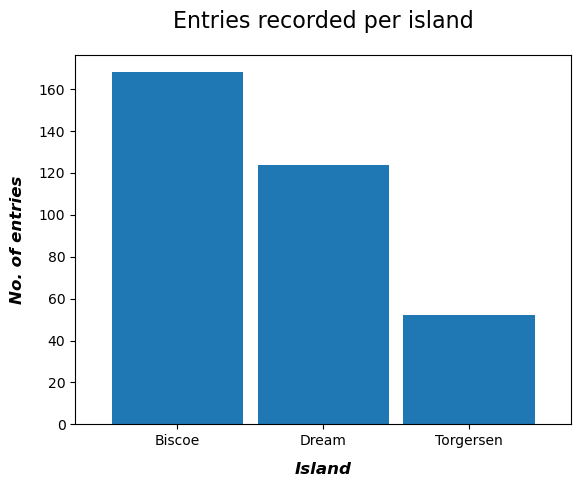

In [86]:
# Grouping the data by island and counting the number of entries
grouped_data = df.groupby('island').size()

# Plotting the bar chart and setting the width of the bars
grouped_data.plot(kind='bar', width=0.9)

# Adding title and labels to the plot
plt.title("Entries recorded per island", fontsize=16, y=1.05) # size and location of title set 
plt.xlabel("Island", fontweight='bold', fontstyle='italic', fontsize=12, labelpad=10) # size, style and and location of x-axis label font set 
plt.ylabel("No. of entries", fontweight='bold', fontstyle='italic', fontsize=12, labelpad=10) # size, style and and location of y-axis label font set 

plt.xticks(rotation=0) # Adjusting x-axis labels for the bars in the chart to be written horizontally

# Showing the plot
plt.show()

Looking at the histogram above we can see the number of penguins per island varies.  
With majority of the peguins located in the Biscoe, followed by Dream and Torgersen.

Next we will venture deeper, still looking at the breakdown per island but also considering the species per island. 

#### Number of each species per island


In [87]:
# Calculate the likelihood for each species on each island
t_adelie = torgersen_df['species'].value_counts().get('Adelie', 0)
t_chinstrap = torgersen_df['species'].value_counts().get('Chinstrap', 0)
t_gentoo = torgersen_df['species'].value_counts().get('Gentoo', 0)

d_adelie = dream_df['species'].value_counts().get('Adelie', 0)
d_chinstrap = dream_df['species'].value_counts().get('Chinstrap', 0)
d_gentoo = dream_df['species'].value_counts().get('Gentoo', 0)

b_adelie = biscoe_df['species'].value_counts().get('Adelie', 0)
b_chinstrap = biscoe_df['species'].value_counts().get('Chinstrap', 0)
b_gentoo = biscoe_df['species'].value_counts().get('Gentoo', 0)

# Calculate total counts for each island
t_total = t_adelie + t_chinstrap + t_gentoo
d_total = d_adelie + d_chinstrap + d_gentoo
b_total = b_adelie + b_chinstrap + b_gentoo

# Create a table
table = [
    ['Island', 'Adelie Penguin', 'Chinstrap Penguin', 'Gentoo Penguin', 'Total per island'],
    ['Torgerson', t_adelie, t_chinstrap, t_gentoo, t_total],
    ['Dream', d_adelie, d_chinstrap, d_gentoo, d_total],
    ['Biscoe', b_adelie, b_chinstrap, b_gentoo, b_total],
    ['Total per species', 
     t_adelie + d_adelie + b_adelie,
     t_chinstrap + d_chinstrap + b_chinstrap,
     t_gentoo + d_gentoo + b_gentoo,
     t_total + d_total + b_total]
]

# Print the table
print(f'Table view for each species per island & totals:\n')
print(tb(table, headers='firstrow', tablefmt='grid'))


Table view for each species per island & totals:

+-------------------+------------------+---------------------+------------------+--------------------+
| Island            |   Adelie Penguin |   Chinstrap Penguin |   Gentoo Penguin |   Total per island |
+===================+==================+=====================+==================+====================+
| Torgerson         |               52 |                   0 |                0 |                 52 |
+-------------------+------------------+---------------------+------------------+--------------------+
| Dream             |               56 |                  68 |                0 |                124 |
+-------------------+------------------+---------------------+------------------+--------------------+
| Biscoe            |               44 |                   0 |              124 |                168 |
+-------------------+------------------+---------------------+------------------+--------------------+
| Total per species |  

#### Bar chart showing the breakdown per islands per species

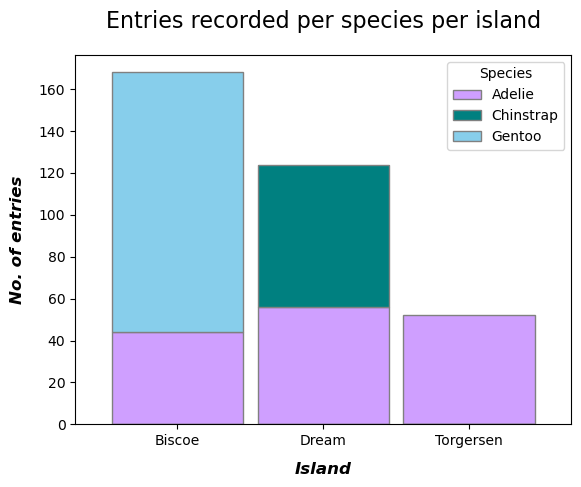

In [88]:
# Grouping the data by island & species, counting the number of entries and stacking the species per island
island_data_grouped = df.groupby(['island', 'species']).size().unstack()

# Plotting bar chart as stacked, setting a boarder around the groups of data, determining the colour of the columns and setting the width 
island_data_grouped.plot(kind='bar', stacked=True, edgecolor='grey', color=["#CF9FFF", "#008080", "#87CEEB"], width=0.9)

# Adding title and labels to the plot
plt.title("Entries recorded per species per island", fontsize = 16, y=1.05) # size and location of title set
plt.xlabel("Island", fontweight='bold', fontstyle='italic', fontsize = 12, labelpad=10) # size, style and and location of x-axis label font set 
plt.ylabel("No. of entries", fontweight='bold', fontstyle='italic', fontsize = 12, labelpad=10)  # size, style and and location of y-axis label font set

plt.xticks(rotation=0) # Adjusting x-axis labels for the bars in the chart to be written horizontally
plt.legend(title="Species") # adding the legend to the chart and giving a title

# Showing the plot
plt.show()

From looking at the information colour coded per species we can learn a lot about the how the different species are spread across the islands.  
Starting with the <span style="color:#CF9FFF">Adelie</span> species, there is a relatively similar number of Adelie penguins found on each island.  

For <span style="color:#008080">Chinstrap</span> we see based on the data in the dataset they are only found on the dream island.  

For <span style="color:#87CEEB">Gentoo</span> similarly this species is found only on one island, Biscoe island.  

Next we will do some simple calculations based on the data in the dataset to see what the likelihood is of finding a specific species of penguin depending on the island. 


In [89]:
# Calculate the likelihood for each species on each island
t_adelie_likelihood = (t_adelie / len(torgersen_df)) * 100
t_chinstrap_likelihood = (t_chinstrap / len(torgersen_df)) * 100
t_gentoo_likelihood = (t_gentoo / len(torgersen_df)) * 100

d_adelie_likelihood = (d_adelie / len(dream_df)) * 100
d_chinstrap_likelihood = (d_chinstrap / len(dream_df)) * 100
d_gentoo_likelihood = (d_gentoo / len(dream_df)) * 100

b_adelie_likelihood = (b_adelie / len(biscoe_df)) * 100
b_chinstrap_likelihood = (b_chinstrap / len(biscoe_df)) * 100
b_gentoo_likelihood = (b_gentoo / len(biscoe_df)) * 100

# Create a table and setting the percentages to 2 decimal places
table = [
    ['Island', 'Adelie Penguin', 'Chinstrap Penguin', 'Gentoo Penguin'],
    ['Torgerson', f'{t_adelie_likelihood:.2f}%', f'{t_chinstrap_likelihood:.2f}%', f'{t_gentoo_likelihood:.2f}%'],
    ['Dream', f'{d_adelie_likelihood:.2f}%', f'{d_chinstrap_likelihood:.2f}%', f'{d_gentoo_likelihood:.2f}%'],
    ['Biscoe', f'{b_adelie_likelihood:.2f}%', f'{b_chinstrap_likelihood:.2f}%', f'{b_gentoo_likelihood:.2f}%']
]

# Print the table
print(f'Probability of each species occurance per island:\n')
print(tb(table, headers='firstrow', tablefmt='grid'))


Probability of each species occurance per island:

+-----------+------------------+---------------------+------------------+
| Island    | Adelie Penguin   | Chinstrap Penguin   | Gentoo Penguin   |
+===========+==================+=====================+==================+
| Torgerson | 100.00%          | 0.00%               | 0.00%            |
+-----------+------------------+---------------------+------------------+
| Dream     | 45.16%           | 54.84%              | 0.00%            |
+-----------+------------------+---------------------+------------------+
| Biscoe    | 26.19%           | 0.00%               | 73.81%           |
+-----------+------------------+---------------------+------------------+


### Diving into the distribution penguin body mass:
***

Next we'll look at the body mass across the penguins using histograms.  
First looking at the dataset as a whole and then including the sex of the penguins to see how the distribution compares across the sexes.

#### Distribution of the body mass overall:

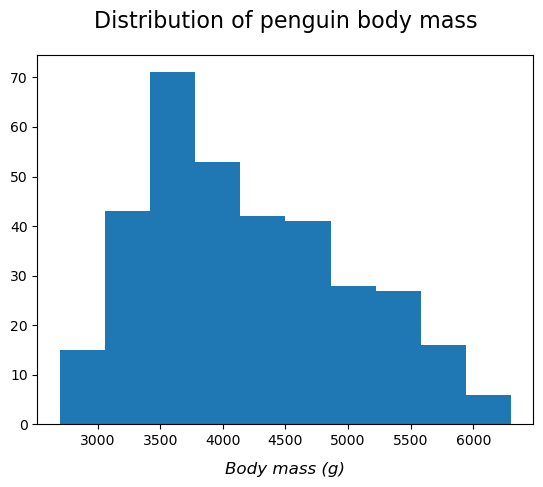

In [90]:
# Plotting a histogram showing the distribution of body mass across the dataset
plt.hist(df["body_mass_g"])
plt.xlabel('Body mass (g)', fontstyle='italic', fontsize = 12, labelpad=10)  # setting size, style and and location of x-axis label font set
plt.title("Distribution of penguin body mass",  fontsize = 16, y=1.05)  # setting size, style and and location of y-axis label font set
plt.show() # showing the plot

From the histogram above we can see the distribution is unimodal with a single peak indicating that there is one dominant body mass range amoung the dataset.  

The result is a right-skewed histogram with the peak of the data to the left of the center with more penguins having a lower body mass and fewer penguins having a higher body mass resulting in a gradual reduction of the bins as you go further to the right of the plot.  

Overall the data suggests that most penguins have relatively lower body masses while some outliers will have higher body mass.

Next we will look at the body mass across both male and female penguins.

#### Distribution of penguin body mass per sex

In [91]:
count_sex = df["sex"].value_counts()
print(count_sex)


sex
MALE      168
FEMALE    165
Name: count, dtype: int64


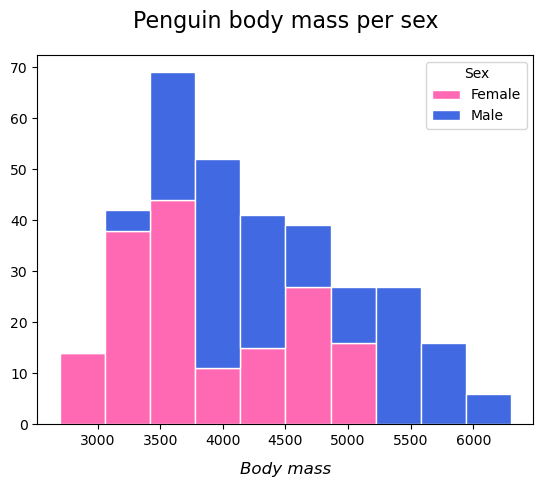

In [92]:
# Plotting a histogram showing the distribution of body mass across the dataset showing the additional context of the distribution of the body mass depending on the sex of the penguin
plt.hist([female_df['body_mass_g'].to_numpy(), male_df['body_mass_g'].to_numpy()], # selecting the body mass info for entries depending on if the sex is female or male using the filter set above
    stacked=True, # setting the bar chart as stacked
    label=['Female', 'Male'], edgecolor='white', color=['#FF69B4', '#4169E1']) # setting labels for the legend, adding white edge colour and colour of the bars.
plt.title("Penguin body mass per sex",  fontsize = 16, y=1.05) # setting plot title
plt.xlabel("Body mass", fontstyle='italic', fontsize = 12, labelpad=10) # setting size, style and and location of x-axis label font

plt.legend(title="Sex") # adding the legend to the chart and giving a title
plt.show() # showing the plot

When we take the sexes of the penguins into consideration we can make some interesting observations. 

Starting with the <span style="color:#4169E1">male</span>  penguins, we see the penguins which contributes for the right tail of the distribution on the right are male.  
The distribution of the body mass for male penguins appears to be broader than that of the female penguins as we can see a higher number of blue columns in the histogram.  

Now looking at the <span style="color:#FF69B4">female</span> penguins, the data would indicate that the female penguins tend to have a lower body mass compared to the males.  
Female penguins also appear to have a narrower range of distribution compared to their male counterparts which we see from the lower number of pink columns in the histogram. 

Overall this is overlap between the male and female penguins body mass but we can see male penguins generally exhibit higher variablity in body mass.

The broader distribution of the body mass for the males would indicate that there is a higher standard deviation than females meaning that the male penguins would be expected to vary more widely around the mean body mass while the female penguins could cluster more closely to the mean body mass.  
To validate this assumption we will look at the standard deviation for the sexes.

In [93]:

# Calculate the standard deviation for male and female penguins
male_std = male_df['body_mass_g'].std()
female_std = female_df['body_mass_g'].std()

# Create a table and setting the standard deviation to 2 decimal places
s_body_mass_table = [
    ['Sex', 'Standard deviation of body mass'],
    ['Male', f'{male_std:.2f} grams'],
    ['Female', f'{female_std:.2f} grams']
]

print(tb(s_body_mass_table, headers='firstrow', tablefmt='grid'))



+--------+-----------------------------------+
| Sex    | Standard deviation of body mass   |
+========+===================================+
| Male   | 787.63 grams                      |
+--------+-----------------------------------+
| Female | 666.17 grams                      |
+--------+-----------------------------------+


Looking at the output of the calculations we can see that the standard deviation for male penguins is higher than that for female penguins which matches our insight from the result of the histogram.  
Therefore we can further deduce that the body masses of male penguins show more spread around the mean compared to the females.

### Comparison of flipper length vs body mass
***

In the next section of the notebook we'll take two variables (flipper length & body mass) and delve deeper their relationship looking at the correlation between the two varaibles.  
By calculating the correlation between the flipper length and body mass we will be able to better understand the strength and assess the linear relationship between the two.  

#### Calculating the correlation between the flipper length vs body mass

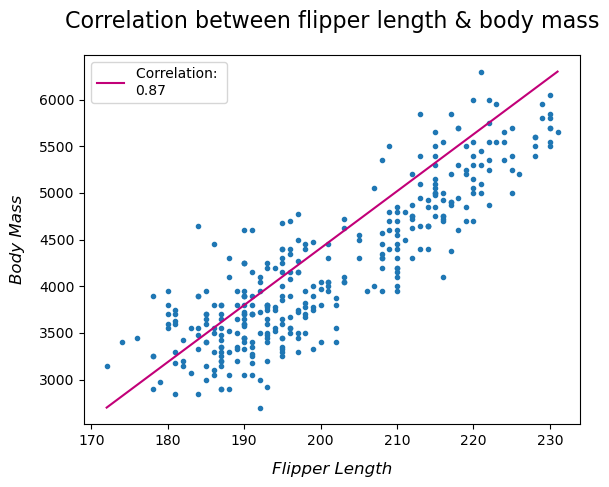

In [94]:
# Calculating the Pearson correlation coefficient between the flipper length and body mass using the .corr method.
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])

# Plotting the data using the variable set for the previous plot and setting the marker type
plt.plot(flip_len, body_mass, ".")

# Adding a line representing the correlation value
# Plotting the line from the the minimum of both columns and to the maximum
# The label tag is being used to also show the calculation of the corealation on the plot for the readers reference
plt.plot([df['flipper_length_mm'].min(), df['flipper_length_mm'].max()],
         [df['body_mass_g'].min(), df['body_mass_g'].max()], 
         color='xkcd:magenta', label=(f'Correlation: \n{correlation:.2f}'))

# Setting the title & axis labels and defining the size, style and location of the title/labels
plt.title('Correlation between flipper length & body mass',  fontsize = 16, y=1.05)
plt.xlabel('Flipper Length', fontstyle='italic', fontsize = 12, labelpad=10)
plt.ylabel('Body Mass', fontstyle='italic', fontsize = 12, labelpad=10)

plt.legend()
plt.show()

The correlation coefficient of 0.87 shows a strong positive linear relationship between flipper length and body mass for the dataset.  
This is represented visually in the scatterplot above by the line in the plot increasing on both x and y axis as we progress along the axes.

This indicates a high degree of predicability in the relationship between the flipper length and body mass, when one increases the other also tends to increase as well.  
However, it's important to remember in the above we are only focusing on two variables flipper length and body mass across the whole dataset. 

Next we will look another level deeper taking the species of penguin into account as well.  
To do this first we will recreate the scatter plot but this time we will colour code the plot to show the different species.  
Then we will assess if there are any interesting patterns that can be descerned when taking the species of the penguin into account.

#### Highlighting the difference between the species

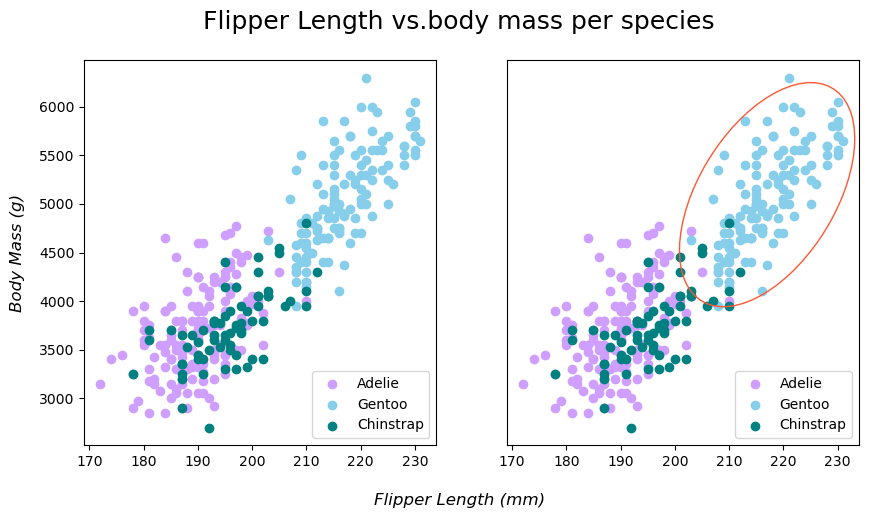

In [95]:
# flipper_length_mm	vs body_mass_g plot colour coded per species

# Get bill length and bill depth for different species of penguins
adelie_flip_len = adelie_data['flipper_length_mm'].to_numpy()
adelie_body_mass = adelie_data['body_mass_g'].to_numpy()

gentoo_flip_len = gentoo_data['flipper_length_mm'].to_numpy()
gentoo_body_mass = gentoo_data['body_mass_g'].to_numpy()

chinstrap_flip_len = chinstrap_data['flipper_length_mm'].to_numpy()
chinstrap_body_mass = chinstrap_data['body_mass_g'].to_numpy()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

# Plotting a scatter plot for the penguins seperating per species 
plt.scatter(adelie_flip_len, adelie_body_mass, color='#CF9FFF', label='Adelie')
plt.scatter(gentoo_flip_len, gentoo_body_mass, color='#87CEEB', label='Gentoo')
plt.scatter(chinstrap_flip_len, chinstrap_body_mass, color='#008080', label='Chinstrap')

# Setting the title & axis labels and defining the size, style and location of the title/labels
plt.ylabel('Body Mass (g)', fontstyle='italic', fontsize = 12, labelpad=10)

# Showing legend in bottom right corner
plt.legend(loc = "lower right")

plt.subplot(1, 2, 2)

# Plotting a scatter plot for the penguins separating per species 
plt.scatter(adelie_flip_len, adelie_body_mass, color='#CF9FFF', label='Adelie')
plt.scatter(gentoo_flip_len, gentoo_body_mass, color='#87CEEB', label='Gentoo')
plt.scatter(chinstrap_flip_len, chinstrap_body_mass, color='#008080', label='Chinstrap')

# Removing y label for second subplot as they use the same range as plot in position 1
plt.yticks([])

# Showing legend in the bottom right corner
plt.legend(loc="lower right")

# Setting the parameters for the ellipse to outline Gentoo data
x_center = 217  # sets the point on the x-axis for the center of the ellipse using the mean flipper length value (seen in Gentoo numbers summary above)
y_center = 5095  # sets the point on the y-axis for the center of the ellipse using the mean body mass value (seen in Gnetoo numbers summary above)
width = 28  # sets the width of the ellipse
height = 2305  # sets the height of the ellipse

# Create the outline of the Gentoo data using the Ellipse function
ellipse = elps((x_center, y_center), width, height, angle = -0.40, edgecolor='#FF5733', facecolor='none')
plt.suptitle('Flipper Length vs.body mass per species',  fontsize = 18)
# Adding a super x label
plt.figtext(0.5, -0.01, 'Flipper Length (mm)', ha='center', fontsize=12, fontstyle='italic')

# Add the ellipse to the plot
plt.gca().add_patch(ellipse)

# Show the plot
plt.show()

When the different species in the plot are reflected by colour it can be seen that there is some clustering of the data depending on the species.  
For the Adelie and Chinstrap penguins there is an overlap, which indicates that it is more likely for there to be similarities between these two species when it comes to the body mass and flipper length, compared to the Gentoo species which is more of an outlier and we see far less overlap with the other two species in the plot.  

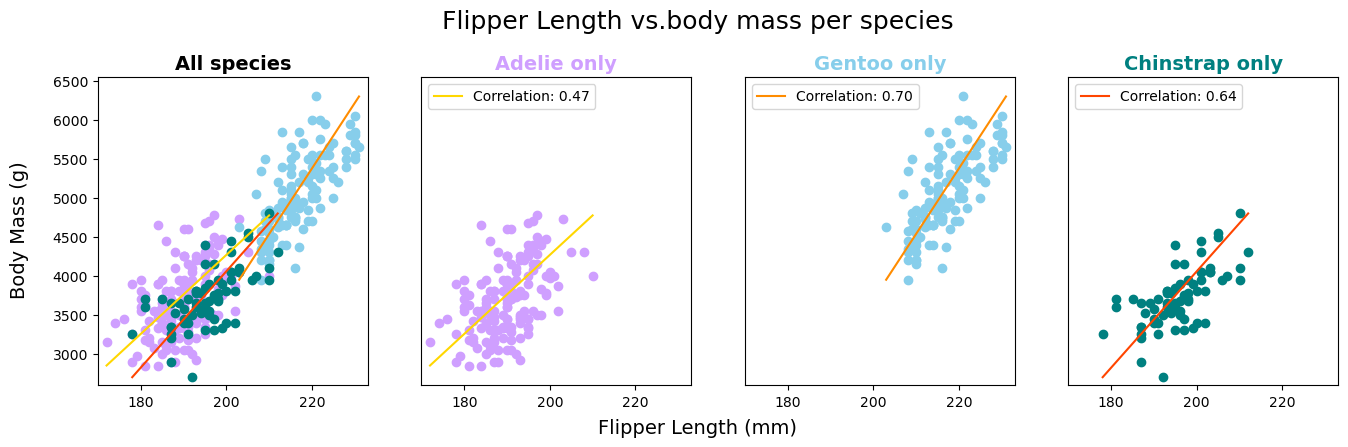

In [96]:

# Calculating the Pearson correlation coefficient between the flipper length and body mass using the .corr method.
adelie_correlation = adelie_data['flipper_length_mm'].corr(adelie_data['body_mass_g'])
gentoo_correlation = gentoo_data['flipper_length_mm'].corr(gentoo_data['body_mass_g'])
chinstrap_correlation = chinstrap_data['flipper_length_mm'].corr(chinstrap_data['body_mass_g'])

# setting the x & y axis range so it can be reused across all subplots 
y_min = 2600
y_max = 6550
x_min = 170
x_max = 233

# Get bill length and bill depth for different species of penguins
adelie_flip_len = adelie_data['flipper_length_mm'].to_numpy()
adelie_body_mass = adelie_data['body_mass_g'].to_numpy()

gentoo_flip_len = gentoo_data['flipper_length_mm'].to_numpy()
gentoo_body_mass = gentoo_data['body_mass_g'].to_numpy()

chinstrap_flip_len = chinstrap_data['flipper_length_mm'].to_numpy()
chinstrap_body_mass = chinstrap_data['body_mass_g'].to_numpy()
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
# Plotting a scatter plot for the penguins seperating per species 
plt.scatter(adelie_flip_len, adelie_body_mass, color='#CF9FFF', label='Adelie')
# Adding a line representing the correlation value
# Plotting the line from the the minimum of both columns and to the maximum
# The label tag is being used to also show the calculation of the corealation on the plot for the readers reference
plt.plot([adelie_data['flipper_length_mm'].min(), adelie_data['flipper_length_mm'].max()],
         [adelie_data['body_mass_g'].min(), adelie_data['body_mass_g'].max()], 
         color='#FFD700', label=(f'Adelie corr: {adelie_correlation:.2f}'))


plt.scatter(gentoo_flip_len, gentoo_body_mass, color='#87CEEB', label='Gentoo')
plt.plot([gentoo_data['flipper_length_mm'].min(), gentoo_data['flipper_length_mm'].max()],
         [gentoo_data['body_mass_g'].min(), gentoo_data['body_mass_g'].max()], 
         color='#FF8C00', label=(f'Gentoo corr: {gentoo_correlation:.2f}'))

plt.scatter(chinstrap_flip_len, chinstrap_body_mass, color='#008080', label='Chinstrap')
plt.plot([chinstrap_data['flipper_length_mm'].min(), chinstrap_data['flipper_length_mm'].max()],
         [chinstrap_data['body_mass_g'].min(), chinstrap_data['body_mass_g'].max()], 
         color='#FF4500', label=(f'Chinstrap corr: {chinstrap_correlation:.2f}'))

plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)

# Setting the title & axis labels and defining the size, style and location of the title/labels
plt.title('All species',  fontsize = 14, y=1, fontweight='bold')

plt.subplot (1, 4, 2)

# flipper_length_mm	vs body_mass_g plot colour coded per species

plt.scatter(adelie_flip_len, adelie_body_mass, color='#CF9FFF')
plt.plot([adelie_data['flipper_length_mm'].min(), adelie_data['flipper_length_mm'].max()],
         [adelie_data['body_mass_g'].min(), adelie_data['body_mass_g'].max()], 
         color='#FFD700', label=(f'Correlation: {adelie_correlation:.2f}'))
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)
plt.title('Adelie only',  fontsize = 14, y=1, color='#CF9FFF', fontweight='bold')
plt.yticks([])


# Plotting a scatter plot for the penguins seperating per species 
# Setting the title & axis labels and defining the size, style and location of the title/labels
plt.legend(loc = "upper left")

plt.subplot (1, 4, 3)

# Plotting a scatter plot for the penguins seperating per species 
plt.scatter(gentoo_flip_len, gentoo_body_mass, color='#87CEEB')
plt.plot([gentoo_data['flipper_length_mm'].min(), gentoo_data['flipper_length_mm'].max()],
         [gentoo_data['body_mass_g'].min(), gentoo_data['body_mass_g'].max()], 
         color='#FF8C00', label=(f'Correlation: {gentoo_correlation:.2f}'))
plt.title('Gentoo only',  fontsize = 14, y=1, color='#87CEEB', fontweight='bold')
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)
plt.yticks([])
plt.legend(loc = "upper left")

plt.subplot (1, 4, 4)

plt.scatter(chinstrap_flip_len, chinstrap_body_mass, color='#008080')
plt.plot([chinstrap_data['flipper_length_mm'].min(), chinstrap_data['flipper_length_mm'].max()],
         [chinstrap_data['body_mass_g'].min(), chinstrap_data['body_mass_g'].max()], 
         color='#FF4500', label=(f'Correlation: {chinstrap_correlation:.2f}'))
plt.title('Chinstrap only',  fontsize = 14, y=1, color='#008080', fontweight='bold')
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)
plt.yticks([])
# Showing legend in upper left corner
plt.legend(loc = "upper left")

plt.suptitle('Flipper Length vs.body mass per species',  fontsize = 18, y=1.05)
# Adding a super x label
plt.figtext(0.5, -0.01, 'Flipper Length (mm)', ha='center', fontsize=14)
# Adding a super y label
plt.figtext(0.07, 0.5, 'Body Mass (g)', va='center', rotation='vertical', fontsize=14)
# Show the plot
plt.show()

### Next actions: Ideas for plots 
- ~~sub plot w/ 6 unique plots:
bill lenght vs bill depth, bill lenght vs flipper len, bill lenght vs body mass, bill depth vs flipper len, bill depth vs body mass, flipper len vs body mass~~
- ~~Check into ways of enhancing the histogram to show split between male and female penguins~~
- ~~Make final decsion for which variables to focus on for project > Body mass vs Flipper length~~
- ~~Part 1 of tidying notebook to remove additional graphy that are not needed~~
- ~~Calculate correlation between body mass & flipper length and plot to graph~~
- Add analysis and commentary to accompany the plots in notebook (i.e. explain types of variables used and why) > in progress
- Build README.md file (create sections, add resources used) > started

***
### End